<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Arman Lotfalikhani

**Student ID**: 99109166

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [10]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
train=np.load('q2-train.npy')
valid=np.load('q2-valid.npy')
test=np.load('q2-test.npy')

X_train, Y_train=train[:,0],train[:,1]
X_val, Y_val=valid[:,0],valid[:,1]
X_test, Y_test=valid[:,0],valid[:,1]
### END CODE HERE ###

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [21]:
def create_matrix(X):
    '''
    X: an m by 1 array 
    '''
    new_X = None
    ### START CODE HERE ###
    #We know we are changing k from 0 to 12, and k is not given to us in the function. 
    #So we are forced to create the matrix for k=12 and select appropriate parts of it in later sections
    #This is not a good way but we have no other choice, given that we cannot change the inputs
    k=12
    klist=np.arange(k+1)
    m=X.shape
    k_matrix=np.outer(klist,np.ones(m))# creates a matrix with each row having a single value from 0 to k
    new_X=np.power(X,k_matrix).T#The resulting matrix has to be trasposed to fit the shaping criterion
    ### END CODE HERE ###
    return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [22]:
# If you need any other function for training write it here
# (like gradient descent or anything else)
def direct_method(X, Y):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    '''
    w = None
    ### START CODE HERE ###
    X_dagger=np.linalg.pinv(X)
    w=X_dagger@Y
    ### END CODE HERE ###
    return w

def loss(X, Y, w):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    w: an (n+1) by 1 weight vector
    '''
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    delta=X@w-Y
    loss=np.mean(np.power(delta,2),axis=0)
    ### END CODE HERE ###
    return loss

In [42]:
def train(X_train, Y_train, X_val, Y_val, k):
    '''
    X_train: an m_train by 1 vector contains training points
    Y_train: an m_train by 1 vector contains training values
    X_val: an m_val by 1 vector contains validation points
    Y_val: an m_val by 1 vector contains validation values
    k: degree of polynomial
    '''
    w, loss_train, loss_val = None, None, None
    ### START CODE HERE ###
    train_matrix=create_matrix(X_train)[:,:k+1]
    valid_matrix=create_matrix(X_val)[:,:k+1]
    w=direct_method(train_matrix,Y_train)
    loss_train=loss(train_matrix,Y_train,w)
    loss_val=loss(valid_matrix,Y_val,w)
    ### END CODE HERE ###
    return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**: Increasing k at first decreases the loss function on both the test set and the validation set. But after a certain value, we reach overfitting and the loss jumps to a much higher level for the validation set. It is obvious the increasing k is equal to increasing the number of model parameters.

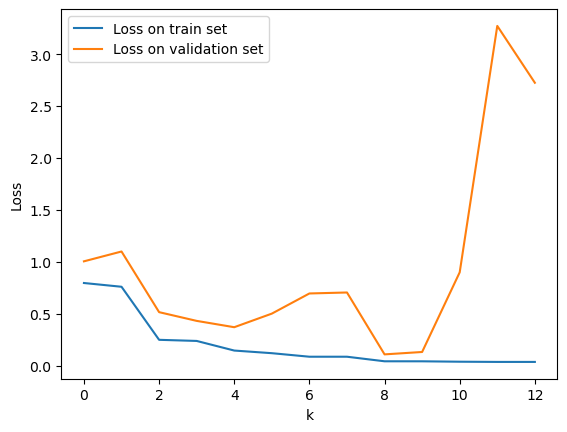

In [44]:
### START CODE HERE ###
k=12
klist=np.arange(k+1)
train_loss_list=np.zeros(k+1)
valid_loss_list=np.zeros(k+1)
for i in range(k+1):
    w, loss_train, loss_val=train(X_train, Y_train, X_val, Y_val, i)
    train_loss_list[i]=loss_train
    valid_loss_list[i]=loss_val

plt.plot(train_loss_list, label='Loss on train set')
plt.plot(valid_loss_list, label='Loss on validation set')
plt.xlabel('k')
plt.ylabel('Loss')
plt.legend()
plt.show()
### END CODE HERE ###

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**: We want to estimate the model performance on input data after is has been trained, so we need to separate some of the dataset and not include it in any of the training steps. This part of the data is the test set. Note that by selecting the model with the lowest error on the validation set, we have included the validation set in the training as well, so the validation and the test sets are different.

In [47]:
### START CODE HERE ###
best_k=np.argmin(valid_loss_list)
w, loss_train, loss_test=train(X_train, Y_train, X_test, Y_test, best_k)
print(best_k)
print(loss_test)
### END CODE HERE ###

8
0.11129319169042891
